In [69]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Entanglement of a pair of quantum emitters via continuous fluorescence measurements: a tutorial

### SME - ENTANGLEMENT BY JOINT HOMODYNE DETECTION OF FLUORESCENCE, Chap.5

In [70]:
def theo_concurrence(t, gamma):
    return 2*np.exp(-gamma*t)*(1-np.exp(-gamma*t)) 

def concurrence_pure_state(state): 
    ###Compute the concurrence for a pure state
    return 2*np.abs(state[0]*state[3]-state[1]*state[2])

def compute_concurrences(solution):
    ntraj = len(solution.runs_states)
    n_times = len(solution.runs_states[0])  # si assume che tutte le traiettorie abbiano stesso numero di time step

    conc_array = np.zeros((ntraj, n_times))

    for traj_idx in range(ntraj):
        for t_idx, state in enumerate(solution.runs_states[traj_idx]):

            if state.isket:
                conc_array[traj_idx, t_idx] = concurrence_pure_state(state) #Use fast method for pure states
            else:               
                conc_array[traj_idx, t_idx] = concurrence(state)

    return conc_array

def compute_mean_concurrence(conc_array):
    mean_conc = np.mean(np.array(conc_array), axis=0)
    return mean_conc

### Two atoms that emit photons by spontaneous decay, these photons are collected and let them pass through a beam splitter, then we perform homodyne detection

The system is described by Hamiltonian:
$H_{tot} = H_{atom_1} + H_{atom_2} + H_{env} + H_{int}$

where $(\hbar=1)$ $H_{atom_j} = \dfrac{\omega}{2} \cdot \hat{\sigma_{z}}^{j}$

and $H_{int} = \gamma \sum_{j=1}^{2} \left( \hat{a}_{j} \hat{\sigma}_{+}^{j} +\hat{a}^{\dagger}_{j} \hat{\sigma}_{-}^{j}      \right)$

The associated stochastic master equation when performing joint homodyne detection is:

$d \varrho = -i \left[ H_{atoms}, \varrho\right] + \gamma \mathcal{D}\left[\sigma_{-}^{(1)}\right]\varrho+\gamma \mathcal{D}\left[\sigma_{-}^{(2)}\right]\varrho$

In [ ]:
#  Convenzione: |e> = (1,0) and |g> = (0,1)

# parameters
GAMMA = 1              # Atom decay rate
OMEGA = 1
T_1 = 1 / GAMMA  # time constant for the decay
ntraj = 500 # number of trajectories
I_2 = qeye(2)  # identity operator for 2-level system
sm = sigmam()  # lowering operator for 2-level system (atom)

# operators
sigma_minus_1 = tensor(sm, I_2) # lowering operator for atom 1
sigma_minus_2 = tensor(I_2, sm) # lowering operator for atom 2
sigma_minus_12 = tensor(sigma_minus_1, sigma_minus_2) # combined lowering operator for both atoms    

sigma_plus_1 = sigma_minus_1.dag() # raising operator for atom 1
sigma_plus_2 = sigma_minus_2.dag() # raising operator for atom       
sigma_plus_12 = tensor(sigma_plus_1, sigma_plus_2) # raising operator for both atoms

H_free_atom_1 = 0.5 * OMEGA * tensor(sigmaz(), I_2) # Free Hamiltonian atom 1
H_free_atom_2 = 0.5 * OMEGA * tensor(I_2, sigmaz()) # Free Hamiltonian atom 2
H_free = H_free_atom_1 + H_free_atom_2 # Free Hamiltonian for both atoms        

ee = tensor(basis(2, 0), basis(2, 0))# initial vector state, |e, e> (the atoms must decay from the excited state!)
times = np.arange(0, 5*T_1, 0.001*T_1) # time vector

## Joint homodyne
$d \varrho = -i \left[ H_{atoms}, \varrho\right] + \gamma \mathcal{D}\left[\sigma_{-}^{(1)}\right]\varrho+\gamma \mathcal{D}\left[\sigma_{-}^{(2)}\right]\varrho = -i \left[ H, \varrho\right] + \gamma \mathcal{D}\left[ \dfrac{\sigma_{-}^{(1)}+\sigma_{-}^{(2)}}{\sqrt{2}}\right]\varrho+\gamma \mathcal{D}\left[ \dfrac{\sigma_{-}^{(1)}-\sigma_{-}^{(2)}}{\sqrt{2}}\right]\varrho$

In [ ]:
my_theta = [0, 1 / (6), 1 / (4), 1 / (3), 1 /2] # angles for the homodyne detection

mean_conc_ee_solutions_jhom = []

for theta in my_theta:
        sc_ops = [
        np.sqrt(GAMMA / 2) * (sigma_minus_1 + sigma_minus_2),
        np.exp(1j * np.pi * theta) * np.sqrt(GAMMA / 2) * (sigma_minus_1 - sigma_minus_2)
    ]
        
        my_exp = ssesolve(
            H_free, ee, times,
            sc_ops=sc_ops, 
            ntraj=ntraj,
            options={"dt": 0.001, "store_states": True, "keep_runs_results": True},
        )

        conc_ee_solutions_jhom = compute_concurrences(my_exp)
        mean_conc = compute_mean_concurrence(conc_ee_solutions_jhom)

        mean_conc_ee_solutions_jhom.append(mean_conc)

10.0%. Run time:  49.95s. Est. time left: 00:00:07:29
20.0%. Run time: 102.27s. Est. time left: 00:00:06:49
30.0%. Run time: 143.93s. Est. time left: 00:00:05:35
40.0%. Run time: 185.52s. Est. time left: 00:00:04:38
50.0%. Run time: 239.69s. Est. time left: 00:00:03:59
60.0%. Run time: 281.59s. Est. time left: 00:00:03:07
70.0%. Run time: 326.73s. Est. time left: 00:00:02:20
80.0%. Run time: 374.81s. Est. time left: 00:00:01:33
90.0%. Run time: 419.00s. Est. time left: 00:00:00:46
100.0%. Run time: 465.90s. Est. time left: 00:00:00:00
Total run time: 467.17s


C:\Users\campa\AppData\Local\Temp\ipykernel_5440\2207448988.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  conc_array[traj_idx, t_idx] = concurrence_pure_state(state) #Use fast method for pure states


10.0%. Run time:  56.31s. Est. time left: 00:00:08:26
20.0%. Run time: 113.55s. Est. time left: 00:00:07:34
30.0%. Run time: 169.76s. Est. time left: 00:00:06:36
40.0%. Run time: 226.73s. Est. time left: 00:00:05:40
50.0%. Run time: 288.98s. Est. time left: 00:00:04:48
60.0%. Run time: 331.35s. Est. time left: 00:00:03:40
70.0%. Run time: 379.87s. Est. time left: 00:00:02:42
80.0%. Run time: 426.60s. Est. time left: 00:00:01:46
90.0%. Run time: 472.57s. Est. time left: 00:00:00:52
100.0%. Run time: 516.75s. Est. time left: 00:00:00:00
Total run time: 517.83s
10.0%. Run time:  43.37s. Est. time left: 00:00:06:30
20.0%. Run time:  88.58s. Est. time left: 00:00:05:54
30.0%. Run time: 133.90s. Est. time left: 00:00:05:12
40.0%. Run time: 177.50s. Est. time left: 00:00:04:26
50.0%. Run time: 238.75s. Est. time left: 00:00:03:58
60.0%. Run time: 283.80s. Est. time left: 00:00:03:09
70.0%. Run time: 330.43s. Est. time left: 00:00:02:21
80.0%. Run time: 379.22s. Est. time left: 00:00:01:34
90.

In [36]:
#B_10_solutions_jhom = ssesolve(
    #H_free, bell_state("10"), times,
    #sc_ops=[np.sqrt(GAMMA) * (sigma_minus_1+sigma_minus_2)/np.sqrt(2), np.sqrt(GAMMA) * (sigma_minus_1-sigma_minus_2)/np.sqrt(2)],  # Two stochastic collapse operators 
    #ntraj=ntraj,
    #options={"store_states": True, "keep_runs_results": True},
#)

In [ ]:
#my_exp = ee_solutions_jhom

#conc_ee_solutions_jhom = compute_concurrences(my_exp)
#mean_conc_ee_solutions_jhom = compute_mean_concurrence(conc_ee_solutions_jhom)

C:\Users\campa\AppData\Local\Temp\ipykernel_5440\2207448988.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  conc_array[traj_idx, t_idx] = concurrence_pure_state(state) #Use fast method for pure states


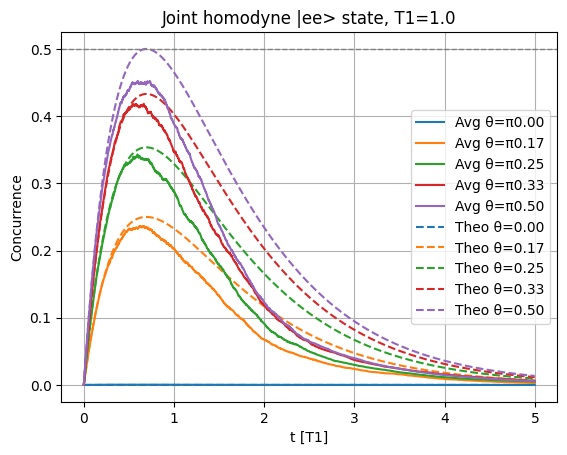

In [ ]:
line_theta = []
line_theo = []

for i, theta in enumerate(my_theta):
    # plottiamo la curva per il theta i-esimo
    line_theta_temp, = plt.plot(times, mean_conc_ee_solutions_jhom[i], label=f"Avg θ=π{(theta):.2f}")
    line_theta.append(line_theta_temp)

    line_theor_temp, = plt.plot(times, theo_concurrence(times, GAMMA)*np.sin(np.pi*theta), color=line_theta_temp.get_color(), linestyle ='--', label=f"Theo θ={theta:.2f}")
    line_theo.append(line_theor_temp)

#line2, = plt.plot(times, conc_ee_solutions_jhom[11], label="Trajectory #10")
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, label='y = 0.5')
#plt.axhline(y=1, color='red', linestyle='-', linewidth=1.5, label='y = 1')

plt.xlabel("t [T1]")
plt.ylabel("Concurrence")
plt.title(f"Joint homodyne |ee> state, T1={T_1}")
plt.grid(True)
plt.legend(handles = line_theta + line_theo)
plt.show()



# Inefficient joint homodyne detection
## $\sqrt{\gamma} \rightarrow \sqrt{\gamma \cdot \eta} $ and $\theta=\pi/2$

In [90]:
#my_theta = [0, 1/6, 1/4, 1/3, 1/2] # angles for the homodyne detection in unit of pi
my_eta = [1, 0.6] #etas for the homodyne detection

ntraj = 10

mean_conc_ee_solutions_jhom_ineff = []

for eta in my_eta:       
        my_c_ops = [
        np.sqrt(GAMMA / 2) * (sigma_minus_1 + sigma_minus_2),
        np.sqrt(GAMMA / 2) * (sigma_minus_1 - sigma_minus_2)*np.exp(1j * np.pi/2)
    ]
        
        my_sc_ops = [ #eta only here! (Right?)
        np.sqrt(GAMMA*eta / 2) * (sigma_minus_1 + sigma_minus_2),
        np.sqrt(GAMMA*eta / 2) * (sigma_minus_1 - sigma_minus_2) * np.exp(1j * np.pi/2)
    ]
        
        jhom_ineff = smesolve(
            H_free, ee.proj(), times,
            c_ops = my_c_ops,
            sc_ops = my_sc_ops, 
            ntraj=ntraj,
            options={"dt": 0.001, "store_states": True, "keep_runs_results": True},
        )

        conc_ee_solutions_jhom_ineff = compute_concurrences(jhom_ineff)
        mean_conc = compute_mean_concurrence(conc_ee_solutions_jhom_ineff)

        mean_conc_ee_solutions_jhom_ineff.append(mean_conc)

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00


20.0%. Run time:   5.47s. Est. time left: 00:00:00:21
30.0%. Run time:  11.73s. Est. time left: 00:00:00:27
40.0%. Run time: 10815.12s. Est. time left: 00:04:30:22
50.0%. Run time: 10818.42s. Est. time left: 00:03:00:18
60.0%. Run time: 46400.95s. Est. time left: 00:08:35:33
70.0%. Run time: 46407.65s. Est. time left: 00:05:31:28
80.0%. Run time: 46412.89s. Est. time left: 00:03:13:23
90.0%. Run time: 46418.50s. Est. time left: 00:01:25:57
100.0%. Run time: 46424.27s. Est. time left: 00:00:00:00
Total run time: 46430.21s
10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   5.80s. Est. time left: 00:00:00:23
30.0%. Run time:  12.50s. Est. time left: 00:00:00:29
40.0%. Run time:  18.13s. Est. time left: 00:00:00:27
50.0%. Run time:  23.64s. Est. time left: 00:00:00:23
60.0%. Run time:  29.83s. Est. time left: 00:00:00:19
70.0%. Run time:  36.42s. Est. time left: 00:00:00:15
80.0%. Run time:  43.92s. Est. time left: 00:00:00:10
90.0%. Run time:  50.24s. Est. time left:

In [87]:
mean_conc_ee_solutions_jhom_ineff[0]

array([0.        , 0.0003207 , 0.00139661, ..., 0.        , 0.        ,
       0.        ], shape=(5000,))

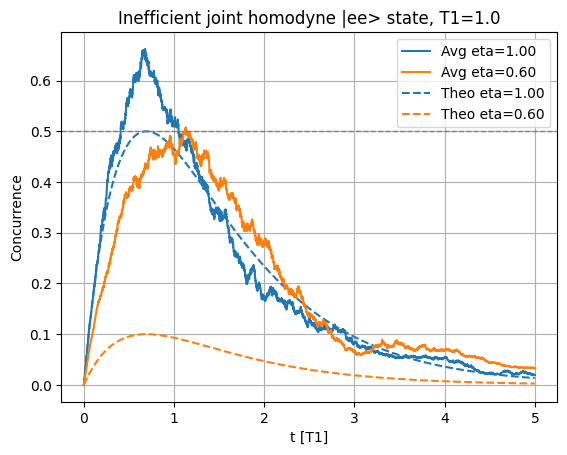

In [89]:
line_eta = []
line_theo_eta = []

for i, eta in enumerate(my_eta):
    # plottiamo la curva per il theta i-esimo
    line_eta_temp, = plt.plot(times, mean_conc_ee_solutions_jhom_ineff[i], label=f"Avg eta={(eta):.2f}")
    line_eta.append(line_eta_temp)

    if eta >= 0.5:
        line_theor_temp, = plt.plot(times, theo_concurrence(times, GAMMA)*(2*eta-1), color=line_eta_temp.get_color(), linestyle ='--', label=f"Theo eta={eta:.2f}")
        line_theo_eta.append(line_theor_temp)

#line2, = plt.plot(times, conc_ee_solutions_jhom[11], label="Trajectory #10")
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, label='y = 0.5')
#plt.axhline(y=1, color='red', linestyle='-', linewidth=1.5, label='y = 1')

plt.xlabel("t [T1]")
plt.ylabel("Concurrence")
plt.title(f"Inefficient joint homodyne |ee> state, T1={T_1}")
plt.grid(True)
plt.legend(handles = line_eta + line_theo_eta)
plt.show()